# Analisis de logs con Python

## Importar librerias

In [2]:
# from google.colab import drive
import matplotlib.pyplot as plt

In [3]:
# drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


## Funciones

### Leer archivo

In [3]:
def read_file(file):
    with open(file, 'r') as file:
        data = file.readlines()
        return [line.strip() for line in data]

### Obtener datos de una columna por índice

In [4]:
def filter_by_column(array, index):
  return [line.split(' ')[index] for line in array]

### Filtrar registros basados en el valor de una columna

In [5]:
def include_filter(array, column_index, value):
  return [line for line in array if line.split(' ')[column_index] == value]

### Filtrar registros por atributo donde los valores sean diferentes

In [6]:
def exclude_filter(array, column_index, value):
  return [line for line in array if line.split(' ')[column_index] != value]

## Revisión general

### Cargar el archivo

In [8]:
# file_log = '/gdrive/My Drive/Colab Notebooks/code/example_log/access_log'    
file_log = 'data/access_log'    
data = read_file(file_log)
data[:10]

['64.242.88.10 - - [07/Mar/2004:16:05:49 -0800] "GET /twiki/bin/edit/Main/Double_bounce_sender?topicparent=Main.ConfigurationVariables HTTP/1.1" 401 12846',
 '64.242.88.10 - - [07/Mar/2004:16:06:51 -0800] "GET /twiki/bin/rdiff/TWiki/NewUserTemplate?rev1=1.3&rev2=1.2 HTTP/1.1" 200 4523',
 '64.242.88.10 - - [07/Mar/2004:16:10:02 -0800] "GET /mailman/listinfo/hsdivision HTTP/1.1" 200 6291',
 '64.242.88.10 - - [07/Mar/2004:16:11:58 -0800] "GET /twiki/bin/view/TWiki/WikiSyntax HTTP/1.1" 200 7352',
 '64.242.88.10 - - [07/Mar/2004:16:20:55 -0800] "GET /twiki/bin/view/Main/DCCAndPostFix HTTP/1.1" 200 5253',
 '64.242.88.10 - - [07/Mar/2004:16:23:12 -0800] "GET /twiki/bin/oops/TWiki/AppendixFileSystem?template=oopsmore&param1=1.12&param2=1.12 HTTP/1.1" 200 11382',
 '64.242.88.10 - - [07/Mar/2004:16:24:16 -0800] "GET /twiki/bin/view/Main/PeterThoeny HTTP/1.1" 200 4924',
 '64.242.88.10 - - [07/Mar/2004:16:29:16 -0800] "GET /twiki/bin/edit/Main/Header_checks?topicparent=Main.ConfigurationVariables 

### conteo de peticiones

In [9]:
print('número de peticiones')
print(len(data))

número de peticiones
1546


### Ver primeras 5 peticiones

In [10]:
data[:5]

['64.242.88.10 - - [07/Mar/2004:16:05:49 -0800] "GET /twiki/bin/edit/Main/Double_bounce_sender?topicparent=Main.ConfigurationVariables HTTP/1.1" 401 12846',
 '64.242.88.10 - - [07/Mar/2004:16:06:51 -0800] "GET /twiki/bin/rdiff/TWiki/NewUserTemplate?rev1=1.3&rev2=1.2 HTTP/1.1" 200 4523',
 '64.242.88.10 - - [07/Mar/2004:16:10:02 -0800] "GET /mailman/listinfo/hsdivision HTTP/1.1" 200 6291',
 '64.242.88.10 - - [07/Mar/2004:16:11:58 -0800] "GET /twiki/bin/view/TWiki/WikiSyntax HTTP/1.1" 200 7352',
 '64.242.88.10 - - [07/Mar/2004:16:20:55 -0800] "GET /twiki/bin/view/Main/DCCAndPostFix HTTP/1.1" 200 5253']

### Peticiones exitosas

In [11]:
success = include_filter(data, -2, '200')
print(len(success))
success[:5]

1274


['64.242.88.10 - - [07/Mar/2004:16:06:51 -0800] "GET /twiki/bin/rdiff/TWiki/NewUserTemplate?rev1=1.3&rev2=1.2 HTTP/1.1" 200 4523',
 '64.242.88.10 - - [07/Mar/2004:16:10:02 -0800] "GET /mailman/listinfo/hsdivision HTTP/1.1" 200 6291',
 '64.242.88.10 - - [07/Mar/2004:16:11:58 -0800] "GET /twiki/bin/view/TWiki/WikiSyntax HTTP/1.1" 200 7352',
 '64.242.88.10 - - [07/Mar/2004:16:20:55 -0800] "GET /twiki/bin/view/Main/DCCAndPostFix HTTP/1.1" 200 5253',
 '64.242.88.10 - - [07/Mar/2004:16:23:12 -0800] "GET /twiki/bin/oops/TWiki/AppendixFileSystem?template=oopsmore&param1=1.12&param2=1.12 HTTP/1.1" 200 11382']

### Peticiones fallidas

In [12]:
fail = exclude_filter(data, -2, '200')
print(len(fail))
fail[:5]

272


['64.242.88.10 - - [07/Mar/2004:16:05:49 -0800] "GET /twiki/bin/edit/Main/Double_bounce_sender?topicparent=Main.ConfigurationVariables HTTP/1.1" 401 12846',
 '64.242.88.10 - - [07/Mar/2004:16:29:16 -0800] "GET /twiki/bin/edit/Main/Header_checks?topicparent=Main.ConfigurationVariables HTTP/1.1" 401 12851',
 '64.242.88.10 - - [07/Mar/2004:16:30:29 -0800] "GET /twiki/bin/attach/Main/OfficeLocations HTTP/1.1" 401 12851',
 '64.242.88.10 - - [07/Mar/2004:16:33:53 -0800] "GET /twiki/bin/edit/Main/Smtpd_etrn_restrictions?topicparent=Main.ConfigurationVariables HTTP/1.1" 401 12851',
 '64.242.88.10 - - [07/Mar/2004:16:45:56 -0800] "GET /twiki/bin/attach/Main/PostfixCommands HTTP/1.1" 401 12846']

## Peticiones GET

### Cantidad de peticiones GET

In [13]:
get_request = include_filter(data, 5, '"GET')
print(f'La cantidad total de peticiones GET es {len(get_request)}')

La cantidad total de peticiones GET es 1525


### Peticiones exitosas vs fallidas

La cantidad total de peticiones GET exitisas es 1254
La cantidad total de peticiones GET fallidas es 271


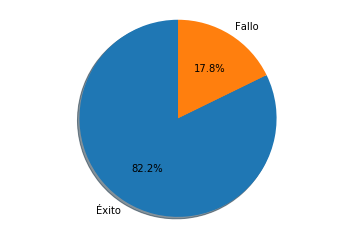

In [14]:
success_get_request = include_filter(get_request, -2, '200')
fail_get_request = exclude_filter(get_request, -2, '200')

success_amount = len(success_get_request)
fail_amount = len(fail_get_request)

print(f'La cantidad total de peticiones GET exitisas es {success_amount}')
print(f'La cantidad total de peticiones GET fallidas es {fail_amount}')

labels = 'Éxito', 'Fallo'
sizes = [success_amount, fail_amount]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

## Peticiones POST

### Cantidad de peticiones POST

In [15]:
get_request = include_filter(data, 5, '"POST')
print(f'La cantidad total de peticiones POST es {len(get_request)}')

La cantidad total de peticiones POST es 14


### Peticiones exitosas vs fallidas

La cantidad total de peticiones POST exitisas es 14
La cantidad total de peticiones POST fallidas es 0


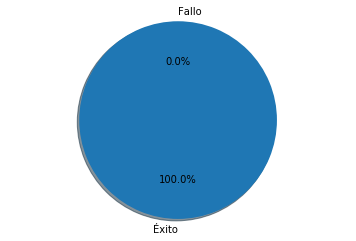

In [16]:
success_post_request = include_filter(get_request, -2, '200')
fail_post_request = exclude_filter(get_request, -2, '200')

success_amount = len(success_post_request)
fail_amount = len(fail_post_request)

print(f'La cantidad total de peticiones POST exitisas es {success_amount}')
print(f'La cantidad total de peticiones POST fallidas es {fail_amount}')

labels = 'Éxito', 'Fallo'
sizes = [success_amount, fail_amount]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

## Nombres de dominio e IPs

### Listar diferentes IPs que hicieron solicitudes

In [31]:
domains_list = filter_by_column(data, 0)
diferent_domains = set(domains_list)

print(f'La cantidad de dominios diferentes son {len(diferent_domains)}')
print(list(diferent_domains)[:5])

La cantidad de dominios diferentes son 172
['64-93-34-186.client.dsl.net', 'pc3-registry-stockholm.telia.net', 'ppp2.p33.is.com.ua', 'ic8234.upco.es', 'lj1061.inktomisearch.com']


### Contar peticiones por dominio

In [32]:
domains_counter = dict()

for domain in diferent_domains:
    domains_counter.update({domain: domains_list.count(domain)})

print(list(domains_counter.items())[:5])

[('64-93-34-186.client.dsl.net', 1), ('pc3-registry-stockholm.telia.net', 13), ('ppp2.p33.is.com.ua', 3), ('ic8234.upco.es', 4), ('lj1061.inktomisearch.com', 1)]


### Ordenar peticiones por mayor cantidad

In [26]:
domains_list = list(domains_counter.items())
domains_sorted = sorted(domains_list, key=lambda domain: domain[1], reverse=True)

print(domains_sorted[:5])

[('64-93-34-186.client.dsl.net', 0), ('pc3-registry-stockholm.telia.net', 0), ('ppp2.p33.is.com.ua', 0), ('ic8234.upco.es', 0), ('lj1061.inktomisearch.com', 0)]


### Mostrar los 5 dominios que hicieron más solicitudes

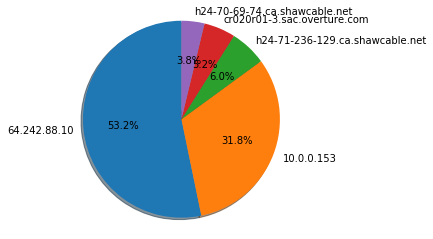

In [20]:
labels = [domain[0] for domain in domains_sorted[:5]]
sizes = [domain[1] for domain in domains_sorted[:5]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

## Fechas

### Obtener las distintas fechas DD/MM/YYYY en las que se hicieron peticiones

In [21]:
dates_hours = filter_by_column(data, 3)
dates = [date.split(':')[0][1:] for date in dates_hours]
diferent_dates = list(set(dates))
diferent_dates

['07/Mar/2004',
 '10/Mar/2004',
 '08/Mar/2004',
 '09/Mar/2004',
 '11/Mar/2004',
 '12/Mar/2004']

### Contar número de peticiones por fecha

In [22]:
dates_counter= dict()

for date in diferent_dates:
  dates_counter.update({date: dates.count(date)})

print(dates_counter)

{'07/Mar/2004': 196, '10/Mar/2004': 286, '08/Mar/2004': 559, '09/Mar/2004': 233, '11/Mar/2004': 199, '12/Mar/2004': 73}


### Graficar cantidad de peticiones por fecha

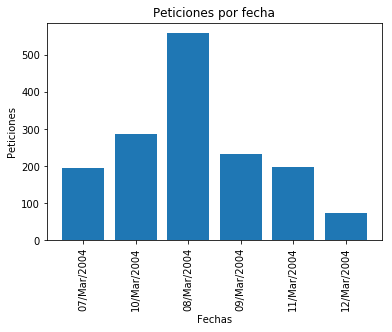

In [23]:
dates_counter_list = list(dates_counter.items())

labels = [date[0] for date in dates_counter_list]
values = [date[1] for date in dates_counter_list]


fig1, ax1 = plt.subplots()
ax1.bar(labels, values)
plt.xticks(labels, rotation='vertical')
plt.xlabel('Fechas')
plt.ylabel('Peticiones')
plt.title('Peticiones por fecha')
plt.show()